# Hashtag Analysis of Tweets in January 2019

### Installing and Importing Necessary Libraries

In [6]:
!pip install wordcloud
import numpy as np
import pandas as pd
import itertools
from os import path
from PIL import Image
import numpy as np
import os
from IPython.display import display, HTML

### Reading Data Into Pandas Dataframes

In [7]:
russia= pd.read_csv('TwitterData/russia_201901_1_tweets_csv_hashed.csv', delimiter=',')


C:\Users\Kayla Moore\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
venez= pd.read_csv('TwitterData/venezuela_201901_2_tweets_csv_hashed.csv', delimiter=',')

In [9]:
iran = pd.read_csv('TwitterData/iranian_tweets_csv_hashed.csv', delimiter=',')

### Gathering Hashtags for Each Country

In [10]:
tagsRussia = russia.hashtags.dropna()
htRussia = []
for x in tagsRussia:
    for y in x.replace('[', '').replace(']', '').replace(',', '').split():
        htRussia.append("#" + y)


In [11]:
tagsVenez = venez.hashtags.dropna()
htVenez = []
for x in tagsVenez:
    for y in x.replace('[', '').replace(']', '').replace(',', '').split():
        htVenez.append("#" + y)

In [12]:
tagsIran = iran.hashtags.dropna()
htIran = []
for x in tagsIran:
    for y in x.replace('[', '').replace(']', '').replace(',', '').split():
        htIran.append("#" + y)

In [13]:
russiaFreq = {}
for word in htRussia:
    if word in russiaFreq:
        russiaFreq[word] += 1
    else:
        russiaFreq[word] = 1
hashDFRussia = pd.DataFrame(list(russiaFreq.items()), columns=['Hashtag', 'Frequency'])
hashDFRussia2 = hashDFRussia.sort_values(by=['Frequency'], ascending = False)[:10]

venezFreq = {}
for word in htVenez:
    if word in venezFreq:
        venezFreq[word] += 1
    else:
        venezFreq[word] = 1
hashDFVenez = pd.DataFrame(list(venezFreq.items()), columns=['Hashtag', 'Frequency'])
hashDFVenez2 = hashDFVenez.sort_values(by=['Frequency'], ascending = False)[:10]

iranFreq = {}
for word in htIran:
    if word in iranFreq:
        iranFreq[word] += 1
    else:
        iranFreq[word] = 1
hashDFIran = pd.DataFrame(list(iranFreq.items()), columns=['Hashtag', 'Frequency'])
hashDFIran2 = hashDFIran.sort_values(by=['Frequency'], ascending = False)[:10]

### Generating WordClouds for Each Country

In [17]:
# get data directory (using getcwd() is needed to support running example in generated IPython notebook)
cwd = path.dirname(__file__) if "__file__" in locals() else os.getcwd()
# read the mask image
# taken from
# http://www.stencilry.org/stencils/movies/alice%20in%20wonderland/255fk.jpg
twitter_mask = np.array(Image.open(path.join(cwd, "TwitterLogo.png")))

d = {}
for a, x in hashDFRussia.values:
    d[a] = x

e = {}
for a, x in hashDFVenez.values:
    e[a] = x

f = {}
for a, x in hashDFIran.values:
    f[a] = x
    
    
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wc = WordCloud(background_color="white", mask=twitter_mask, contour_color='steelblue', width=1200, height=800)
wc.generate_from_frequencies(frequencies=d)

wc2 = WordCloud(background_color="white", mask=twitter_mask, contour_color='steelblue', width=1200, height=800)
wc2.generate_from_frequencies(frequencies=e)

wc3 = WordCloud(background_color="white", mask=twitter_mask, contour_color='steelblue', width=1200, height=800)
wc3.generate_from_frequencies(frequencies=f)


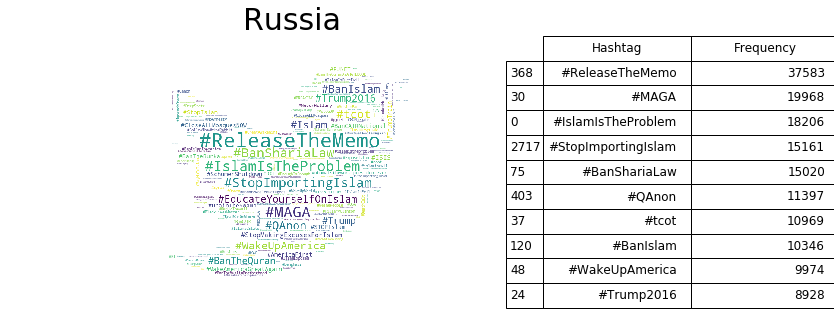

In [71]:
f = plt.figure(figsize=(18, 5))
#f.add_subplot(121)
plt.imshow(wc)
plt.title('Russia', size=30)
plt.axis("off")

htTable = f.add_subplot(122)
font_size=12
bbox=[0.45, 0, 0.65, 1.0]
htTable.axis('off')
mpl_table = htTable.table(cellText = hashDFRussia2.values, rowLabels = hashDFRussia2.index, bbox=bbox, colLabels=hashDFRussia2.columns)
mpl_table.auto_set_font_size(False)
mpl_table.set_fontsize(font_size)


plt.show()



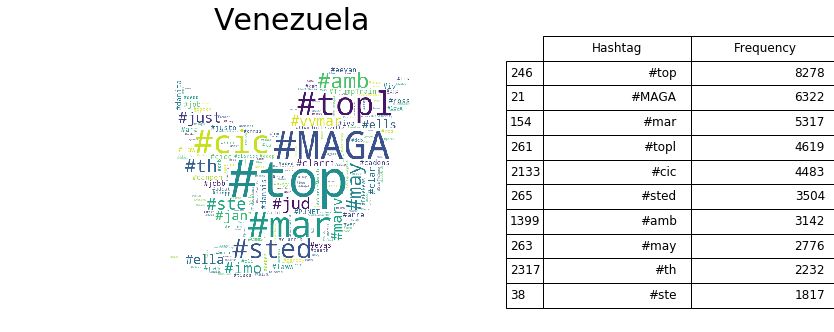

In [70]:
f = plt.figure(figsize=(18, 5))
#f.add_subplot(121)
plt.imshow(wc2)
plt.title('Venezuela', size=30)
plt.axis("off")

htTable = f.add_subplot(122)
font_size=12
bbox=[0.45, 0, 0.65, 1.0]
htTable.axis('off')
mpl_table = htTable.table(cellText = hashDFVenez2.values, rowLabels = hashDFVenez2.index, bbox=bbox, colLabels=hashDFVenez2.columns)
mpl_table.auto_set_font_size(False)
mpl_table.set_fontsize(font_size)


plt.show()



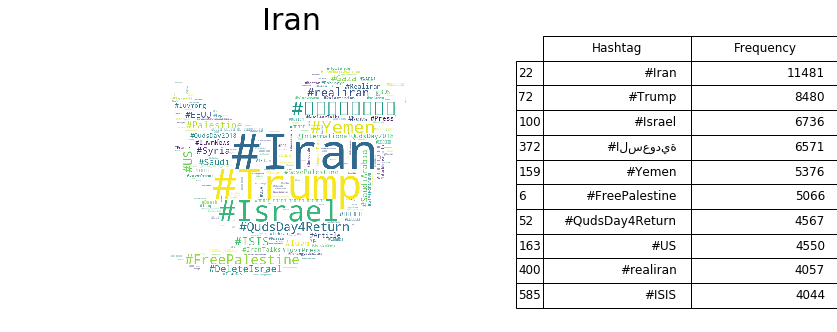

In [69]:
f = plt.figure(figsize=(18, 5))
#f.add_subplot(121)
plt.imshow(wc3)
plt.title('Iran', size=30)
plt.axis("off")

htTable = f.add_subplot(122)
font_size=12
bbox=[0.45, 0, 0.65, 1.0]
htTable.axis('off')
mpl_table = htTable.table(cellText = hashDFIran2.values, rowLabels = hashDFIran2.index, bbox=bbox, colLabels=hashDFIran2.columns)
mpl_table.auto_set_font_size(False)
mpl_table.set_fontsize(font_size)


plt.show()

